In [4]:
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import pipeline
from sklearn.metrics import silhouette_score
from operator import itemgetter
from transformers import pipeline

In [ ]:
twitter_auth_token = '82d534ac6a5b4b88e504634256db48e9f81e729e' 

In [ ]:
filename = 'test.csv'
search_keyword = 'makan bergizi gratis until:2025-09-27 since:2025-09-20 lang:id' # topiknya (ngasal dulu)
limit = 500
!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21)No more tweets found, please check your search criteria and csv file result
Timeout reached 1 times, making sure again...

-- Scrolling... (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14)
Filling in keywords: makan bergizi gratis until:2025-09-27 since:2025-09-20 lang:id

 (15) (16) (17) (18) (19) (20) (21)No more tweets found, please check your search criteria and csv file result
Timeout reached 2 times, making sure again...

-- Scrolling... (1)

Your tweets saved to: c:\Users\Adi Kar

In [ ]:
filename = 'test2.csv'
search_keyword = 'mbg until:2025-09-27 since:2025-09-20 lang:id' 
limit = 500
!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1) (2) (3) (4) (5) (6) (7) (8)
Filling in keywords: mbg until:2025-09-27 since:2025-09-20 lang:id

 (9) (10) (11) (12) (13) (14)

Your tweets saved to: c:\Users\Adi Karunia\Downloads\4 ME\UNAIR\MATKUL\SMT 5\DATMIN\PRAKTIKUM\TM 7\tweets-data\test2.csv
Total tweets saved: 20

-- Scrolling... (1) (2)

Your tweets saved to: c:\Users\Adi Karunia\Downloads\4 ME\UNAIR\MATKUL\SMT 5\DATMIN\PRAKTIKUM\TM 7\tweets-data\test2.csv
Total tweets saved: 39

-- Scrolling... (1)

Your tweets saved to: c:\Users\Adi Karunia\Downloads\4 ME\UNAIR\MATKUL\SMT 5\DATMIN\PRAKTIKUM\TM 7\tweets-data\test2.csv
Total twe

In [25]:
file_path = f"tweets-data/{'test.csv'}"
df1= pd.read_csv(file_path, delimiter=",")

In [26]:
file_path = f"tweets-data/{'test2.csv'}"
df2 = pd.read_csv(file_path, delimiter=",")

In [27]:
combined_df = pd.concat([df1, df2], ignore_index=True)
unique_df = combined_df.drop_duplicates()
unique_df.to_csv('data.csv', index=False)


In [11]:
data = pd.read_csv('data.csv')
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1971725939588603941,Fri Sep 26 23:57:51 +0000 2025,0,Monitoring Pemberian Makan Bergizi Gratis Ting...,1971725939588603941,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197172593958860...,940086585940254721,NaN
1,1971721140566741248,Fri Sep 26 23:38:47 +0000 2025,1,Ahli gizi masyarakat Dr. dr. Tan Shot Yen beri...,1971721140566741248,https://pbs.twimg.com/amplify_video_thumb/1971...,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197172114056674...,1878132951155941376,NaN
2,1971718490278318159,Fri Sep 26 23:28:15 +0000 2025,1,Pasca sejumlah kasus dugaan keracunan akibat M...,1971718490278318159,https://pbs.twimg.com/media/G1zzglXb0AAtRnU.jpg,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197171849027831...,121640063,NaN
3,1971713981925802159,Fri Sep 26 23:10:20 +0000 2025,0,Badan Gizi Nasional (BGN) mengambil langkah te...,1971713981925802159,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197171398192580...,1310446746791600128,NaN
4,1971709682290184318,Fri Sep 26 22:57:23 +0000 2025,0,SPPG yang mengalami kasus keracunan makan berg...,1971710723144417289,NaN,politikana,in,NaN,0,0,0,https://x.com/undefined/status/197171072314441...,18660644,NaN


In [ ]:
def clean_text(text):
  text = text.lower() 
  text = re.sub(r'@[^\s]+', '', text)  
  text = re.sub(r'[^\w\s]', '', text)  
  text = re.sub(r'\d+', '', text)  
  return text
data['full_text_cleaned'] = data['full_text'].apply(clean_text)

0      monitoring pemberian makan bergizi gratis ting...
1      ahli gizi masyarakat dr dr tan shot yen beri k...
2      pasca sejumlah kasus dugaan keracunan akibat m...
3      badan gizi nasional bgn mengambil langkah tega...
4      sppg yang mengalami kasus keracunan makan berg...
                             ...                        
995    gimana sih bisa kepikiran mbg ngasih ikan hiu ...
996               loh emang mbg bukan program depopulasi
997    keluarga pejabat suruh makan mbg jg jirrrrrrrr...
998      video makan gratis di china ini diambil sete...
999                        setelah vaksin muncul mbg omg
Name: full_text_cleaned, Length: 1000, dtype: object

In [13]:
combined_text = ' '.join(data['full_text_cleaned'].tolist())

In [14]:
tokens = word_tokenize(combined_text)
print(tokens)

['monitoring', 'pemberian', 'makan', 'bergizi', 'gratis', 'tingkat', 'sltp', 'polsek', 'baros', 'dukung', 'program', 'pemerintah', 'dalam', 'mencegah', 'terjadinya', 'stunting', 'baros', 'polsek', 'baros', 'polres', 'sukabumi', 'kota', 'dalam', 'rangka', 'mendukung', 'program', 'pemerintah', 'httpstcoxrxofwrc', 'ahli', 'gizi', 'masyarakat', 'dr', 'dr', 'tan', 'shot', 'yen', 'beri', 'kritik', 'tajam', 'untuk', 'program', 'makan', 'bergizi', 'gratis', 'mbg', 'khususnya', 'pilihan', 'menu', 'dalam', 'rapat', 'bersama', 'komisi', 'ix', 'dpr', 'ri', 'di', 'jakartab', 'toyota', 'kijang', 'doyok', 'ia', 'pun', 'tidak', 'pernah', 'menyangka', 'kj', 'edition', 'by', 'promo', 'bundling', 'iphone', 'lebah', 'httpstcogyxyxmru', 'pasca', 'sejumlah', 'kasus', 'dugaan', 'keracunan', 'akibat', 'mbg', 'ramai', 'usulan', 'agar', 'program', 'makan', 'bergizi', 'gratis', 'mbg', 'dievaluasi', 'bahkan', 'oleh', 'anggota', 'dpr', 'program', 'tersebut', 'diusulkan', 'untuk', 'diganti', 'menjadi', 'uang', 'tun

In [15]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]
print(stemmed_tokens)

['monitoring', 'beri', 'makan', 'gizi', 'gratis', 'tingkat', 'sltp', 'polsek', 'baros', 'dukung', 'program', 'perintah', 'dalam', 'cegah', 'jadi', 'stunting', 'baros', 'polsek', 'baros', 'polres', 'sukabumi', 'kota', 'dalam', 'rangka', 'dukung', 'program', 'perintah', 'httpstcoxrxofwrc', 'ahli', 'gizi', 'masyarakat', 'dr', 'dr', 'tan', 'shot', 'yen', 'beri', 'kritik', 'tajam', 'untuk', 'program', 'makan', 'gizi', 'gratis', 'mbg', 'khusus', 'pilih', 'menu', 'dalam', 'rapat', 'sama', 'komisi', 'ix', 'dpr', 'ri', 'di', 'jakartab', 'toyota', 'kijang', 'doyok', 'ia', 'pun', 'tidak', 'pernah', 'sangka', 'kj', 'edition', 'by', 'promo', 'bundling', 'iphone', 'lebah', 'httpstcogyxyxmru', 'pasca', 'jumlah', 'kasus', 'duga', 'racun', 'akibat', 'mbg', 'ramai', 'usul', 'agar', 'program', 'makan', 'gizi', 'gratis', 'mbg', 'evaluasi', 'bahkan', 'oleh', 'anggota', 'dpr', 'program', 'sebut', 'usul', 'untuk', 'ganti', 'jadi', 'uang', 'tunai', 'sikap', 'usul', 'soal', 'mbg', 'ganti', 'uang', 'tunai', 'ke

In [16]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
stemmed_text = ' '.join(stemmed_tokens)
stopped_text = stopword.remove(stemmed_text)
stopped_tokens = word_tokenize(stopped_text)
print(stopped_tokens)

['monitoring', 'beri', 'makan', 'gizi', 'gratis', 'tingkat', 'sltp', 'polsek', 'baros', 'dukung', 'program', 'perintah', 'cegah', 'jadi', 'stunting', 'baros', 'polsek', 'baros', 'polres', 'sukabumi', 'kota', 'rangka', 'dukung', 'program', 'perintah', 'httpstcoxrxofwrc', 'ahli', 'gizi', 'masyarakat', 'dr', 'dr', 'tan', 'shot', 'yen', 'beri', 'kritik', 'tajam', 'program', 'makan', 'gizi', 'gratis', 'mbg', 'khusus', 'pilih', 'menu', 'rapat', 'sama', 'komisi', 'ix', 'dpr', 'ri', 'jakartab', 'toyota', 'kijang', 'doyok', 'pernah', 'sangka', 'kj', 'edition', 'by', 'promo', 'bundling', 'iphone', 'lebah', 'httpstcogyxyxmru', 'pasca', 'jumlah', 'kasus', 'duga', 'racun', 'akibat', 'mbg', 'ramai', 'usul', 'program', 'makan', 'gizi', 'gratis', 'mbg', 'evaluasi', 'bahkan', 'anggota', 'dpr', 'program', 'sebut', 'usul', 'ganti', 'jadi', 'uang', 'tunai', 'sikap', 'usul', 'soal', 'mbg', 'ganti', 'uang', 'tunai', 'kepala', 'badan', 'bizi', 'nasional', 'bgn', 'httpstcoucbhonokx', 'badan', 'gizi', 'nasiona

In [17]:
final_tokens = [token for token in stopped_tokens if token not in ['yg', 'dong', 'kayak', 'aja', 'nya','kan']]
print(final_tokens) 

['monitoring', 'beri', 'makan', 'gizi', 'gratis', 'tingkat', 'sltp', 'polsek', 'baros', 'dukung', 'program', 'perintah', 'cegah', 'jadi', 'stunting', 'baros', 'polsek', 'baros', 'polres', 'sukabumi', 'kota', 'rangka', 'dukung', 'program', 'perintah', 'httpstcoxrxofwrc', 'ahli', 'gizi', 'masyarakat', 'dr', 'dr', 'tan', 'shot', 'yen', 'beri', 'kritik', 'tajam', 'program', 'makan', 'gizi', 'gratis', 'mbg', 'khusus', 'pilih', 'menu', 'rapat', 'sama', 'komisi', 'ix', 'dpr', 'ri', 'jakartab', 'toyota', 'kijang', 'doyok', 'pernah', 'sangka', 'kj', 'edition', 'by', 'promo', 'bundling', 'iphone', 'lebah', 'httpstcogyxyxmru', 'pasca', 'jumlah', 'kasus', 'duga', 'racun', 'akibat', 'mbg', 'ramai', 'usul', 'program', 'makan', 'gizi', 'gratis', 'mbg', 'evaluasi', 'bahkan', 'anggota', 'dpr', 'program', 'sebut', 'usul', 'ganti', 'jadi', 'uang', 'tunai', 'sikap', 'usul', 'soal', 'mbg', 'ganti', 'uang', 'tunai', 'kepala', 'badan', 'bizi', 'nasional', 'bgn', 'httpstcoucbhonokx', 'badan', 'gizi', 'nasiona

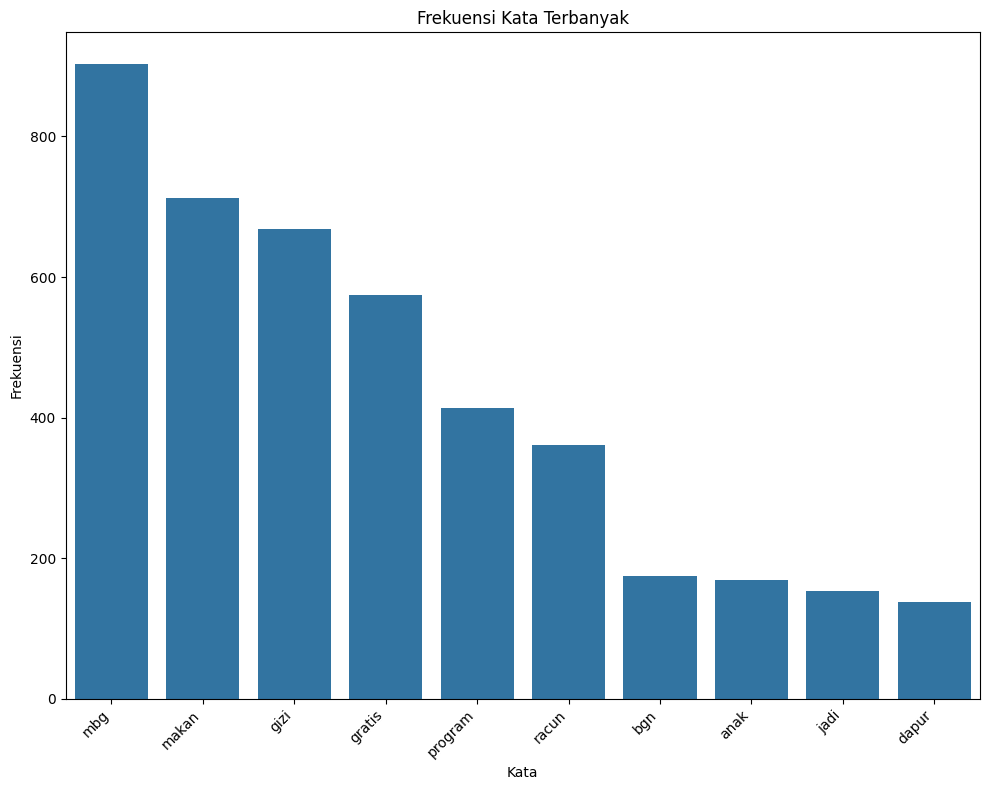

In [18]:
fdist = FreqDist(final_tokens)
most_common_words = fdist.most_common(10)
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 8))
sns.barplot(x='Word', y='Frequency', data=df_word_freq)
plt.title('Frekuensi Kata Terbanyak')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak plot agar label tidak terpotong
plt.show()


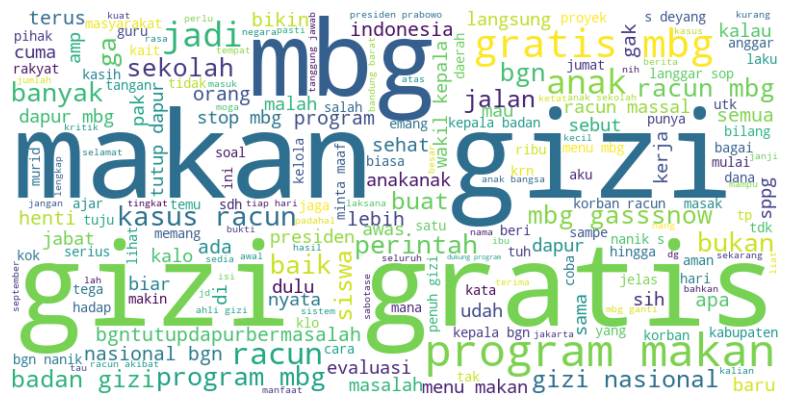

In [19]:
text = " ".join(final_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[^\s]+', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)      
    return text
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_factory = StopWordRemoverFactory()
stopword = stop_factory.create_stop_word_remover()
def preprocess_tweet(tweet):
    tweet = clean_text(tweet)
    tweet = stemmer.stem(tweet)     
    tweet = stopword.remove(tweet)   
    return tweet
data["cleaned_tweet"] = data["full_text"].astype(str).apply(preprocess_tweet)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["cleaned_tweet"])
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data["cluster"] = kmeans.fit_predict(tfidf_matrix)
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(data[data["cluster"] == i]["full_text"].head(5))  


Cluster 0:
0    Monitoring Pemberian Makan Bergizi Gratis Ting...
1    Ahli gizi masyarakat Dr. dr. Tan Shot Yen beri...
2    Pasca sejumlah kasus dugaan keracunan akibat M...
3    Badan Gizi Nasional (BGN) mengambil langkah te...
4    SPPG yang mengalami kasus keracunan makan berg...
Name: full_text, dtype: object

Cluster 1:
7     Saat Kampanye pilpres Bombastis gembar gembor ...
12    @prabowo program makan bergizi gratis ini seba...
26    TUNGGU ADA YG MATI YA PKNBARU BILANG TIDAK WAJ...
34    statement yg similar kaya gapapalah kan ada yg...
35    @gamilaarief Dari awal aku sih dah sanksi sama...
Name: full_text, dtype: object


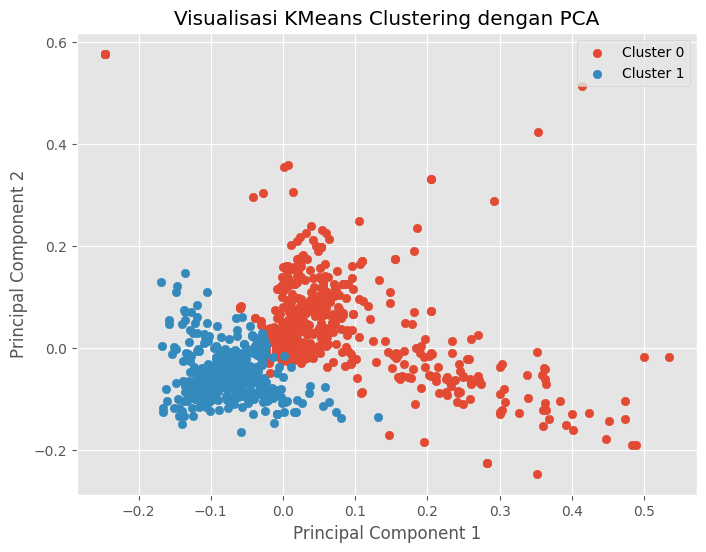

In [38]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())
cluster_labels = data['cluster']
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = reduced_data[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi KMeans Clustering dengan PCA')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.009830653749490294


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                            full_text sentiment
0   Monitoring Pemberian Makan Bergizi Gratis Ting...  Negative
1   Ahli gizi masyarakat Dr. dr. Tan Shot Yen beri...  Negative
2   Pasca sejumlah kasus dugaan keracunan akibat M...  Negative
3   Badan Gizi Nasional (BGN) mengambil langkah te...  Negative
4   SPPG yang mengalami kasus keracunan makan berg...  Negative
5   Wakil Kepala Badan Gizi Nasional (BGN) Nanik S...  Negative
6   @wibisonoys @prabowo Program Makan Bergizi Gra...  Negative
7   Saat Kampanye pilpres Bombastis gembar gembor ...  Negative
8   @tempodotco BGN tuh kan hanya alat legitimasi ...  Negative
9   Anomali Makan Bergizi Gratis . Kurang bergizi ...  Negative
10         Makan Bergizi Gratis Makan Beracun Gratis   Negative
11  @bangherwin Korban keracunan akibat program Ma...  Negative
12  @prabowo program makan bergizi gratis ini seba...  Negative
13  Korban keracunan akibat program Makan Bergizi ...  Negative
14  @ndialamsyah @ARSIPAJA Program MBG a

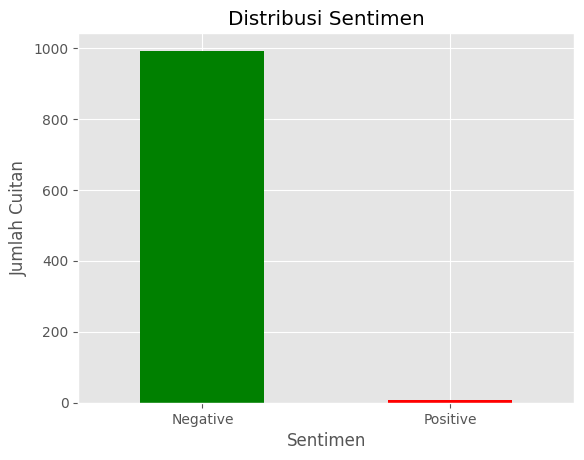

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")
def get_sentiment(text):
    if not text or text.strip() == "":
        return "Neutral"
    try:
        result = sentiment_pipeline(text[:512])[0]
        return result["label"].capitalize()
    except Exception as e:
        print(f"Error pada teks: {text}\n{e}")
        return "Error"
data['sentiment'] = data['cleaned_tweet'].apply(get_sentiment)
print(data[['full_text', 'sentiment']].head(20))
print("\n--- Ringkasan Hasil Sentimen ---")
print(data['sentiment'].value_counts())

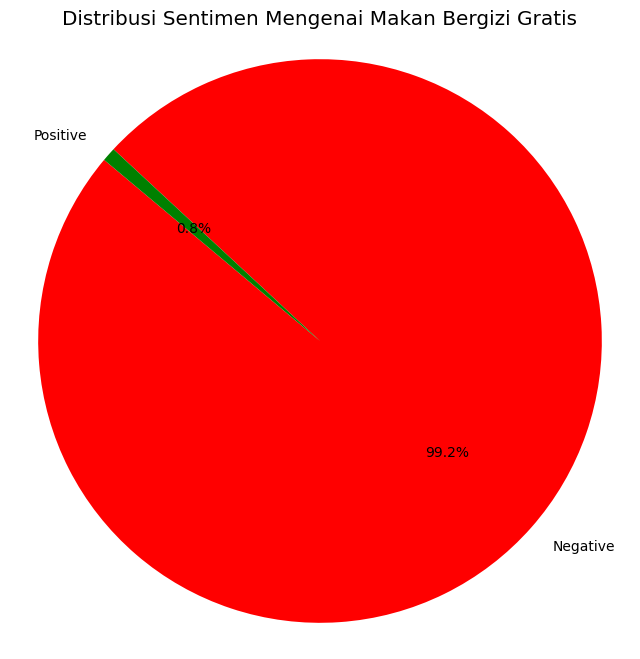

In [ ]:
sentiment_counts = data['sentiment'].value_counts()
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'grey', 'Error': 'orange'}
pie_colors = [colors.get(sentiment, '#cccccc') for sentiment in sentiment_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, 
        labels=sentiment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=pie_colors)
plt.title('Distribusi Sentimen Mengenai Makan Bergizi Gratis')
plt.ylabel('') 
plt.axis('equal')  
plt.show()


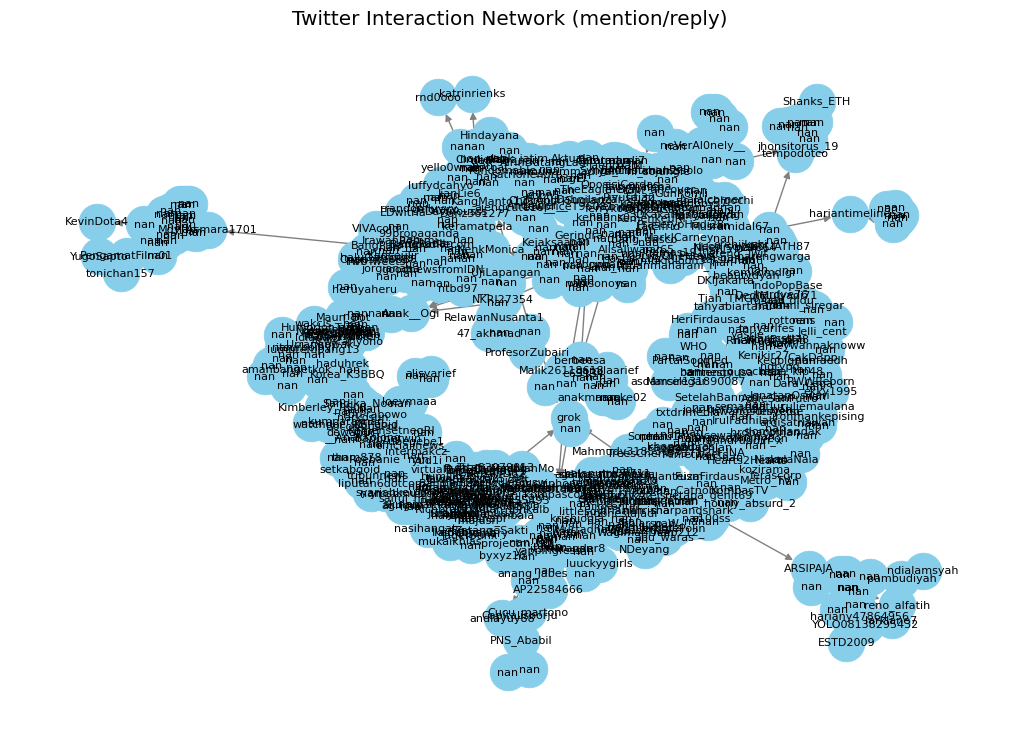

In [ ]:
import re
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
for i, row in data.iterrows():
    user = row.get("username", f"user_{i}")  
    text = row["full_text"]
    mentions = re.findall(r'@(\w+)', text)
    for mention in mentions:
        if user != mention:  
            if G.has_edge(user, mention):
                G[user][mention]["weight"] += 1
            else:
                G.add_edge(user, mention, weight=1)
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=700, font_size=8, node_color="skyblue", edge_color="gray", arrows=True)
plt.title("Twitter Interaction Network (mention/reply)")
plt.show()


In [46]:
import networkx as nx
import pandas as pd
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)
clo_cent = nx.closeness_centrality(G)
eig_cent = nx.eigenvector_centrality(G, max_iter=1000)
centrality_df = pd.DataFrame({
    "Degree": deg_cent,
    "Betweenness": bet_cent,
    "Closeness": clo_cent,
    "Eigenvector": eig_cent
})
centrality_df = centrality_df.sort_values("Degree", ascending=False)
print(centrality_df.head(10))  


                  Degree  Betweenness  Closeness  Eigenvector
prabowo         0.068871     0.000000   0.068871     0.657261
NaN             0.064738     0.000089   0.000000     0.000118
Mdy_Asmara1701  0.034435     0.000000   0.034435     0.328690
kompascom       0.024793     0.000000   0.024793     0.236690
NaN             0.022039     0.000030   0.000000     0.000118
txtdrimedia     0.019284     0.000000   0.019284     0.184118
Urrangawak      0.019284     0.000000   0.019284     0.184118
KangManto123    0.017906     0.000000   0.017906     0.170976
Anak__Ogi       0.016529     0.000000   0.016529     0.157833
NaN             0.015152     0.000021   0.000000     0.000118


Degree Centrality: ('@nan', 1.0)
Closeness Centrality: ('@prabowo', 0.002898550724637681)
Betweenness Centrality: ('@nan', 0.0)


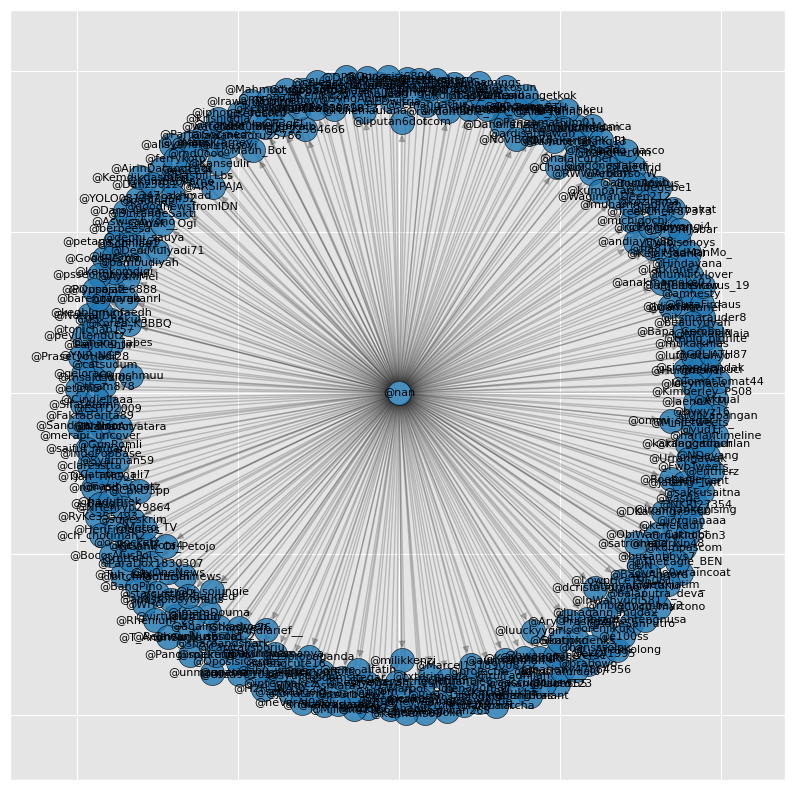

In [35]:
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt

# Membuat graph directed
G_reply = nx.DiGraph()

# Loop tiap baris data
for r in data.iterrows():
    user = f"@{r[1]['username']}"
    text = r[1]['full_text']

    try:
        timestamp = pd.to_datetime(r[1]['created_at'])
    except:
        continue

    # Ekstraksi mention pakai regex
    mentions = set(re.findall(r"@(\w+)", text))

    if len(mentions) > 0:
        for mention in mentions:
            mention = f"@{mention}"
            G_reply.add_edge(user, mention, Timestamp=timestamp)

# Hitung centrality
deg_cent = nx.degree_centrality(G_reply)
clo_cent = nx.closeness_centrality(G_reply)
bet_cent = nx.betweenness_centrality(G_reply, normalized=True)

max_deg = max(deg_cent.items(), key=itemgetter(1))
max_clo = max(clo_cent.items(), key=itemgetter(1))
max_bet = max(bet_cent.items(), key=itemgetter(1))

print("Degree Centrality:", max_deg)
print("Closeness Centrality:", max_clo)
print("Betweenness Centrality:", max_bet)

# Visualisasi graf
pos = nx.spring_layout(G_reply)

plt.figure(figsize=(10, 10))
plt.style.use('ggplot')

nodes = nx.draw_networkx_nodes(G_reply, pos, alpha=0.8)
nodes.set_edgecolor('k')

nx.draw_networkx_labels(G_reply, pos, font_size=8)
nx.draw_networkx_edges(G_reply, pos, width=1.0, alpha=0.2)

plt.show()
